Conexión exitosa. Datos obtenidos desde la API.



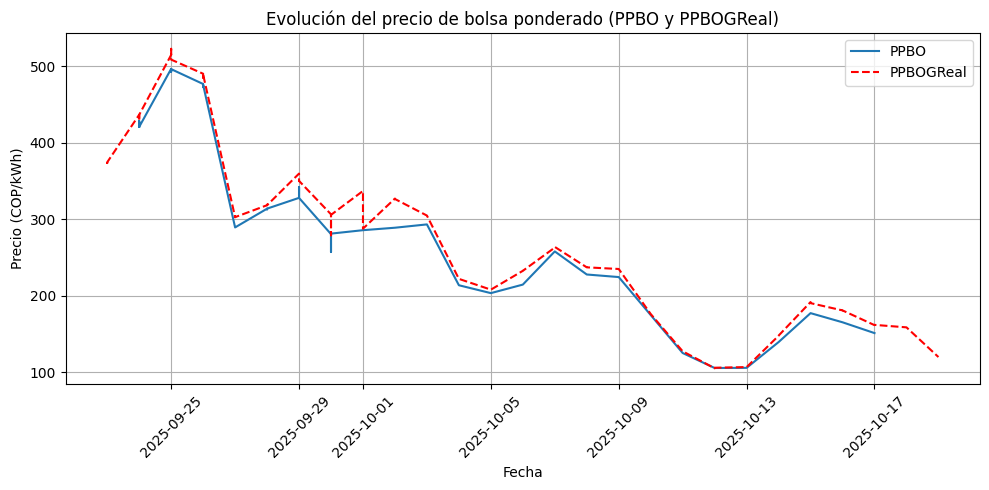

Fechas en el dataset: 2025-09-23  →  2025-10-19


In [ ]:
# Autor: Jose Manuel Criollo Chapal
# Gráfico de PPBO y PPBOGReal desde la API de SIMEM

import requests
import pandas as pd
import matplotlib.pyplot as plt

# 1. Conectar con la API
dataset_id = "96D56E"
url = f"https://www.simem.co/backend-files/api/detalle-datos-publicos?datasetId={dataset_id}"
response = requests.get(url)

if response.status_code != 200:
    raise Exception(f"Error {response.status_code} al acceder a la API")

data = response.json()
print("Conexión exitosa. Datos obtenidos desde la API.\n")

# 2. Convertir los registros a DataFrame
records = data["result"]["records"]
df = pd.DataFrame(records)

# 3. Asegurar tipos correctos
df["Fecha"] = pd.to_datetime(df["Fecha"])
df["Valor"] = pd.to_numeric(df["Valor"], errors="coerce")
df = df.dropna(subset=["Fecha", "Valor"])
df = df.sort_values("Fecha")

# 4. Filtrar las dos variables
ppbo = df[df["CodigoVariable"] == "PPBO"]
ppbog = df[df["CodigoVariable"] == "PPBOGReal"]

# 5. Graficar
plt.figure(figsize=(10, 5))
plt.plot(ppbo["Fecha"], ppbo["Valor"], label="PPBO", linewidth=1.5)
plt.plot(ppbog["Fecha"], ppbog["Valor"], label="PPBOGReal", linestyle="--", linewidth=1.5, color="red")

plt.title("Evolución del precio de bolsa ponderado (PPBO y PPBOGReal)")
plt.xlabel("Fecha")
plt.ylabel("Precio (COP/kWh)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar rango de fechas
print(f"Fechas en el dataset: {df['Fecha'].min().date()}  →  {df['Fecha'].max().date()}")





Al trabajar con la API de SIMEM, se puede ver lo útil que es obtener datos actualizados de forma automática. Este método permite acceder directamente a la información oficial sin depender de archivos descargados manualmente, lo que facilita el análisis continuo y reduce errores humanos. Además, comprender la estructura del JSON y convertirla en un DataFrame ayuda a mejorar las habilidades para trabajar con fuentes de datos reales y dinámicas.